In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PMNS2 import PMNS

# Neutrino Oscillations

## Set parameters: deltaCP, mass ordering

In [3]:
x = PMNS()
# parameter: delta CP [degrees]
x.setDeltaCP(-90*np.pi/180.0)
# parameters: (mass_ordering, one_mass_scale)
# parameter: normal oder: 1, inverted order: -1,
# parameter: one mass scale True/False
x.setMassOrderModel(1, False)
x.calcPMNS()
print("The PMNS matrix: " )
x.printPMNS()
print(x.delta_m12, x.delta_m13, x.delta_m32)

The PMNS matrix: 
[[ 8.43897424e-01+0.j          5.16330960e-01+0.j
   8.92386030e-18+0.1457377j ]
 [-4.08275518e-01+0.0774388j   6.67290332e-01+0.04738023j
   6.16273526e-01+0.j        ]
 [ 3.25106187e-01+0.09724936j -5.31357394e-01+0.05950113j
   7.73929883e-01+0.j        ]]
-7.37e-05 -0.00253685 0.0024631500000000003


## Calculate appearance probability as a function of L/E (km/GeV)

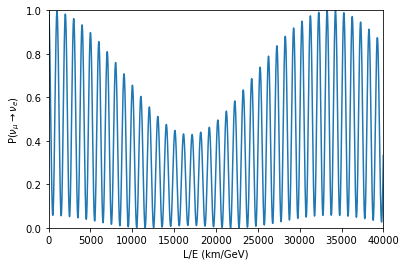

In [4]:
R = []
O = []
# electron: 0, muon: 1, tau: 2
for v in np.array(np.arange(0,40000,10)):
    value = x.calcOsc_L_o_E(1, 1,v)
    O.append(value)
    R.append(v)
    

plt.plot(R,O)
plt.axis([0, 40000, 0., 1])
plt.ylabel(r'P($\nu_{\mu} \rightarrow \nu_{e}$)')
plt.xlabel('L/E (km/GeV)')
plt.show()

## Assuming one-mass scale approximation ($\delta m_{21}^{2} = 0$, $\delta m_{32}^{2} \simeq \delta m_{31}^{2}$, $\theta_{12} = \theta_{13} = 0$)

In [5]:
x2 = PMNS()
# parameter: delta CP [degrees]
x2.setDeltaCP(0)
# parameters: (mass_ordering, one_mass_scale)
# parameter: normal oder: 1, inverted order: -1,
# parameter: one mass scale True/False
x2.setMassOrderModel(1,True)
x2.calcPMNS()

print("The PMNS matrix...")
x2.printPMNS()

The PMNS matrix...
[[ 1.        +0.j  0.        +0.j  0.        +0.j]
 [-0.        +0.j  0.7822821 +0.j  0.62292432+0.j]
 [ 0.        +0.j -0.62292432+0.j  0.7822821 +0.j]]


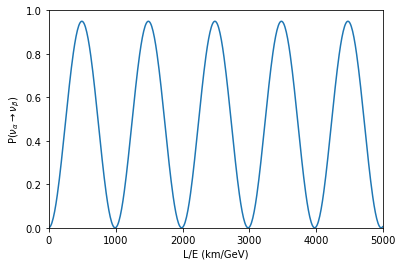

In [6]:
R = []
O = []
for v in np.array(np.arange(0,5000,10)):
    value = x2.calcOsc_L_o_E(2, 1,v)
    O.append(value)
    R.append(v)
    
plt.plot(R,O)
plt.axis([0, 5000, 0., 1])
plt.ylabel(r'P($\nu_{\alpha} \rightarrow \nu_{\beta}$)')
plt.xlabel('L/E (km/GeV)')
plt.show()

## Back to 3 masses, T2K (Tokai to Kamioka) baseline and neutrino beam energy 

<img src="files/T2Kbaseline.jpg" width=400>

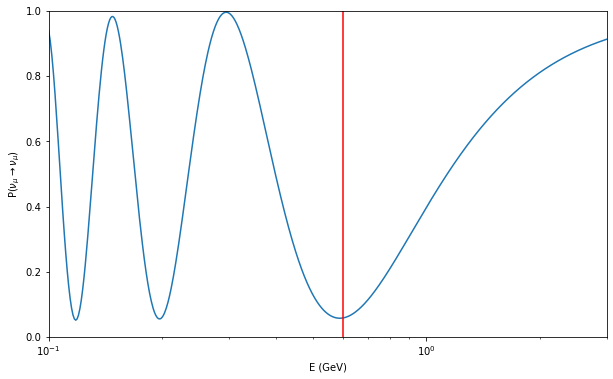

In [7]:
R = []
O = []
L = 295 # km, T2K baseline, off-axis flux peak at 0.6 GeV
# electron: 0, muon: 1, tau: 2

for v in np.array(np.arange(0.01,10,0.001)):
    value = x.calcOsc_E(1, 1, L, v) #v is energy 
    O.append(value)
    R.append(v)
    

plt.figure(figsize=(10,6))
plt.semilogx(R,O)
plt.ylabel(r'P($\nu_{\mu} \rightarrow \nu_{\mu}$)')
plt.xlabel('E (GeV)')
plt.axis([0.1, 3, 0., 1])
plt.axvline(x=0.6, c='r')
plt.show()

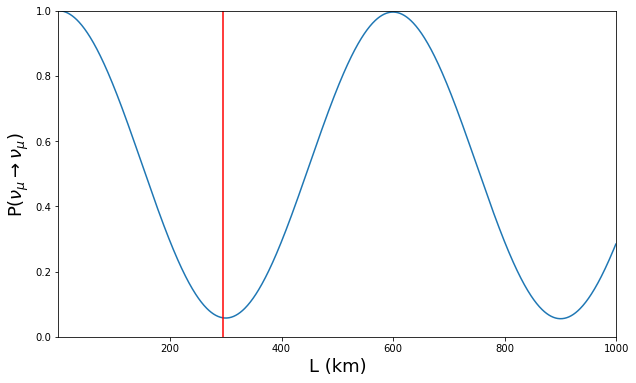

In [8]:
O = []
L = []
E = 0.6 # km, T2K baseline, off-axis flux peak at 0.6 GeV
# electron: 0, muon: 1, tau: 2

for v in np.array(np.arange(1,1000,1)):
    value = x.calcOsc_L_o_E(1, 1, v/E) # v is distance
    O.append(value)
    L.append(v)
    

plt.figure(figsize=(10,6))
#plt.semilogx(L,O)
plt.plot(L,O)
plt.ylabel(r'P($\nu_{\mu} \rightarrow \nu_{\mu}$)', fontsize=18)
plt.xlabel('L (km)', fontsize=18)
plt.axis([0.1, 1000, 0., 1.0])
plt.axvline(x=295, c='r')
plt.show()

## Measurement result from PRL 121, 171802 (2018)

<img src="files/T2K_osc_2018PRL.png">

## DUNE (Deep Underground Neutrino Experiment) baseline and neutrino beam energy

<img src="files/DUNEbaseline.png" width=800>

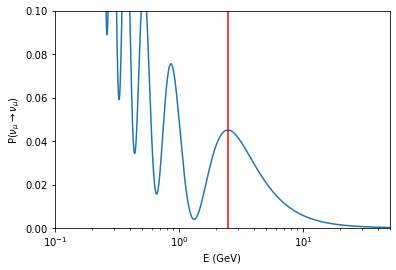

In [9]:
R = []
O = []
L = 1300 # km, DUNE baseline, on-axis flux peak at 2.5 GeV
# electron: 0, muon: 1, tau: 2

for v in np.array(np.arange(0.01,50,0.001)):
    value = x.calcOsc_E(1, 0, L, v)
    O.append(value)
    R.append(v)
    


plt.semilogx(R,O)
plt.ylabel(r'P($\nu_{\mu} \rightarrow \nu_{\mu}$)')
plt.xlabel('E (GeV)')
plt.axis([0.1, 50, 0., 0.1])
plt.axvline(x=2.5, c='r')
plt.show()

## Effect of non-zero CP violation phase

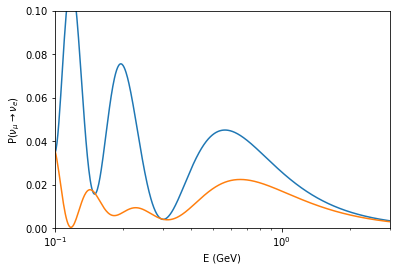

In [11]:
R = []
O = [] # CP normal prob
Oc = [] # CP conjugate prob
L = 295 # km T2K baseline
# parameter: delta CP [degrees]
x.setDeltaCP(270*(np.pi/180.0))
x.calcPMNS()
# electron: 0, muon: 1, tau: 2
for v in np.array(np.arange(0.01,10,0.001)):
    value = x.calcOsc_E(1, 0, L, v)
    valuec = x.calcOsc_E_conj(1, 0, L, v)
    O.append(value)
    Oc.append(valuec)
    R.append(v)
    

plt.semilogx(R,O)
plt.semilogx(R,Oc)
plt.ylabel(r'P($\nu_{\mu} \rightarrow \nu_{e}$)')
plt.xlabel('E (GeV)')
plt.axis([0.1, 3, 0., 0.1])
plt.show()

## In case of zero CP violation phase

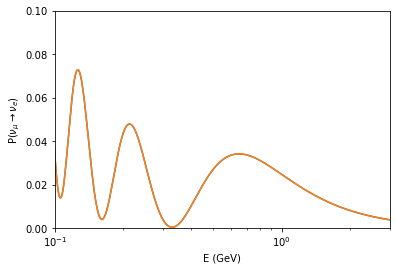

In [12]:
xc = PMNS()
# parameter: delta CP [degrees]
xc.setDeltaCP(0)
xc.setMassOrderModel(1, False)
xc.calcPMNS()

R = []
O = [] # CP normal prob
Oc = [] # CP conjugate prob
L = 295 # km T2K baseline

# electron: 0, muon: 1, tau: 2
for v in np.array(np.arange(0.01,10,0.001)):
    value = xc.calcOsc_E(1, 0, L, v)
    valuec = xc.calcOsc_E_conj(1, 0, L, v)
    O.append(value)
    Oc.append(valuec)
    R.append(v)
    

plt.semilogx(R,O)
plt.semilogx(R,Oc)
plt.ylabel(r'P($\nu_{\mu} \rightarrow \nu_{e}$)')
plt.xlabel('E (GeV)')
plt.axis([0.1, 3, 0., 0.1])
plt.show()

<img src="files/T2K_CPphase_2018PRL.png">

## In case of Unity PMNS matrix

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


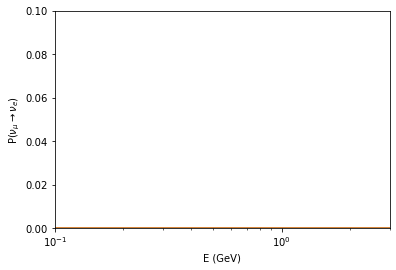

In [14]:
xc = PMNS()
# parameter: delta CP [degrees]
xc.setDeltaCP(-90*np.pi/180.0)
xc.setMassOrderModel(1, False)
xc.calcPMNS()
xc.pmns = np.eye(3,3)
xc.printPMNS()
R = []
O = [] # CP normal prob
Oc = [] # CP conjugate prob
L = 295 # km T2K baseline

# electron: 0, muon: 1, tau: 2
for v in np.array(np.arange(0.01,10,0.001)):
    value = xc.calcOsc_E(1, 0, L, v)
    valuec = xc.calcOsc_E_conj(1, 0, L, v)
    O.append(value)
    Oc.append(valuec)
    R.append(v)
    

plt.semilogx(R,O)
plt.semilogx(R,Oc)
plt.ylabel(r'P($\nu_{\mu} \rightarrow \nu_{e}$)')
plt.xlabel('E (GeV)')
plt.axis([0.1, 3, 0., 0.1])
plt.show()

In [12]:
e = np.eye(3,3)

In [9]:
print(e)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
